In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    "Y":[78.5,74.3,104.3,87.6,95.9,109.2],
    "X1":[7,1,11,11,7,11],
    "X2":[26,29,56,31,52,55]
}
df = pd.DataFrame(data)
df.head(6)
X=df[["X1","X2"]]
Correlation_matrix = X.corr()
print(Correlation_matrix)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          X1        X2
X1  1.000000  0.516735
X2  0.516735  1.000000
  feature       VIF
0      X1  7.778669
1      X2  7.778669


In [3]:
# Download latest version
path = kagglehub.dataset_download("yasserh/bmidataset")
print("Path to dataset files:", path)
import kagglehub

# Calling the dataset using the above path given
data = pd.read_csv(f"{path}/bmi.csv")
print(data.head())

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\yasserh\bmidataset\versions\1
   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
X = data[['Gender','Height','Weight']]

In [5]:
Correlation_matrix = X.corr()
print(Correlation_matrix)

          Gender    Height    Weight
Gender  1.000000  0.017677 -0.009523
Height  0.017677  1.000000  0.000446
Weight -0.009523  0.000446  1.000000


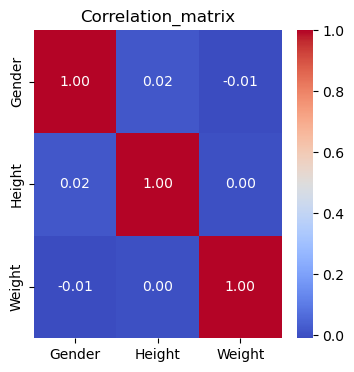

In [6]:
#If you want you can aso compute Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation_matrix')
plt.show()

In [7]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


In [8]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()   #Creating an empty object called scaler that
X_scaled = scaler.fit_transform(X) #fit_transform computes the mean and variance of X
                                # and rescales the value to zero mean and unit variance process

# Apply PCA
pca = PCA() #Creating an empty object called PCA that can be used to perform Principal Component Analysis
X_pca = pca.fit_transform(X_scaled) #X_scaled is the dataset on which you want to perform PCA

# Explained variance ratio to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Select the number of components to retain (e.g., 95% variance)
threshold = 0.66
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.where(cumulative_variance >= threshold)[0][0] + 1

print(f"\nNumber of components to retain {threshold*100:.0f}% variance: {num_components}")

# Transform the data with the selected number of components
pca = PCA(n_components=num_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# The dataset with reduced multicollinearity
X_pca_reduced_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(num_components)])

#Getting Weights (loadings) of each PC
pc_weights = pca.components_

column_names = ['Gender', 'Height', 'Weight']
row_names = ['PC1', 'PC2']
pc_weights_df = pd.DataFrame(pc_weights, columns=column_names, index=row_names)
print("\nweights (loadings) of each PC: ")
print(pc_weights_df)

print("\nDataset after PCA (Reduced Multicollinearity):")
print(X_pca_reduced_df.head(6))


Explained Variance Ratio:
[0.33996503 0.33345745 0.32657752]

Number of components to retain 66% variance: 2

weights (loadings) of each PC: 
       Gender    Height    Weight
PC1  0.710323  0.623826 -0.326010
PC2  0.012226 -0.474029 -0.880424

Dataset after PCA (Reduced Multicollinearity):
        PC1       PC2
0 -0.469228  0.142151
1  0.193476 -0.047564
2  1.230088 -0.533154
3  1.671891 -0.659630
4 -1.069859  1.819112
5  0.022158 -0.510226


In [9]:
#Compute SVD
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

# Select Features
# Explained variance ratio
explained_variance_ratio = (S**2) / np.sum(S**2)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of features to retain (e.g., 95% variance)
threshold = 0.60
num_features = np.where(cumulative_variance >= threshold)[0][0] + 1

# Select the top features based on singular values
selected_features = VT.T[:, :num_features]

# Project the original data onto the selected features
X_reduced = np.dot(X_scaled, selected_features)

# Create DataFrame with reduced features
selected_feature_names = [f'Feature_{i+1}' for i in range(num_features)]
X_reduced_df = pd.DataFrame(X_reduced, columns=selected_feature_names)

print("\nOriginal Data:")
print(data)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print(f"\nNumber of features to retain {threshold*100:.0f}% variance: {num_features}")
print("\nReduced Data (Selected Features):")
print(X_reduced_df)


Original Data:
     Gender  Height  Weight  Index
0         0     174      96      4
1         0     189      87      2
2         1     185     110      4
3         1     195     104      3
4         0     149      61      3
..      ...     ...     ...    ...
495       1     150     153      5
496       1     184     121      4
497       1     141     136      5
498       0     150      95      5
499       0     173     131      5

[500 rows x 4 columns]

Explained Variance Ratio:
[0.33996503 0.33345745 0.32657752]

Number of features to retain 60% variance: 2

Reduced Data (Selected Features):
     Feature_1  Feature_2
0    -0.469228   0.142151
1     0.193476  -0.047564
2     1.230088  -0.533154
3     1.671891  -0.659630
4    -1.069859   1.819112
..         ...        ...
495  -0.537928  -0.689226
496   1.081101  -0.803546
497  -0.709815   0.034228
498  -1.374362   0.864811
499  -0.860076  -0.781412

[500 rows x 2 columns]
